In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import xlrd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
pd.set_option('display.max_columns', None) # To display all columns

Reading in Data from excel file and getting a general overview:

In [2]:
df = pd.read_excel('Data/drug_consumption.xls')

In [3]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
df.shape

(1885, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [6]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


Checking for odd values 

In [7]:
for col in df.columns:
    
    print (col, df[col].unique())

ID [   1    2    3 ... 1886 1887 1888]
Age [ 0.49788 -0.07854 -0.95197  2.59171  1.09449  1.82213]
Gender [ 0.48246 -0.48246]
Education [-0.05921  1.98437  1.16365 -1.22751 -1.7379   0.45468 -0.61113 -2.43591
 -1.43719]
Country [ 0.96082  0.24923 -0.57009 -0.28519 -0.09765  0.21128 -0.46841]
Ethnicity [ 0.126   -0.31685  0.1144  -0.22166 -0.50212 -1.10702  1.90725]
Nscore [ 0.31287 -0.67825 -0.46725 -0.14882  0.73545 -1.32828  0.62967 -0.24649
 -1.05308  2.28554 -0.79151 -0.92104 -2.05048 -1.55078  0.52135  1.37297
 -0.34799 -1.1943   0.41667  1.60383 -0.05188  0.04257  1.02119  0.82562
  0.13606  1.13281 -1.43907 -0.58016  0.22393 -2.21844  0.91093 -2.3436
  1.8399   1.49158  3.27393 -1.69163  1.98437  2.82196  1.23461 -1.86962
  2.127   -2.42317  2.46262  1.72012  2.61139 -2.75696 -2.52197 -3.15735
 -3.46436]
Escore [-0.57545  1.93886  0.80523 -0.80615 -1.6334  -0.30033 -1.09207  2.57309
  0.00332  0.16767  1.45421 -1.50796 -1.23177 -0.15487 -1.7625   0.47617
 -0.94779 -3.27393  0.63

In [8]:
df.nunique()

ID           1885
Age             6
Gender          2
Education       9
Country         7
Ethnicity       7
Nscore         49
Escore         42
Oscore         35
Ascore         41
Cscore         41
Impulsive      10
SS             11
Alcohol         7
Amphet          7
Amyl            7
Benzos          7
Caff            7
Cannabis        7
Choc            7
Coke            7
Crack           7
Ecstasy         7
Heroin          7
Ketamine        7
Legalh          7
LSD             7
Meth            7
Shrooms         7
Nicotine        7
Semer           5
VSA             7
dtype: int64

In [9]:
# we delete every row where a participant indicated the use of 'Semeron', which is a fictional, 
# non existing drug, used to pick out individuals who are exaggerating their drug use:

In [10]:
df1 = df.drop(df.loc[df["Semer"] != "CL0"].index)

Reassigning "real" values for Gender, Country & Education, so we can do better visualizations

In [11]:
Countrycat = df1['Country'].apply(lambda x: {(-0.09765):'Australia', 
                                             0.24923:'Canada',
                                             0.96082:'UK',
                                            (-0.46841):'New Zealand',
                                            (-0.28519):'Other',
                                            (0.21128):'R.o.Ireland',
                                            (-0.57009):'USA'}.get(x,''))
df1.insert(5, "Country_Name", Countrycat)
df1["Country_Name"] = df1["Country_Name"].astype("category")

In [12]:
Educat = df1['Education'].apply(lambda x: {(-2.43591): "under 16y",
                                           (-1.73790): "16y",
                                           (-1.43719): "17y",
                                           (-1.22751): '18y',
                                           (-0.61113):'College/Uni',
                                           (-0.05921):'Cert./Diploma',
                                           (0.45468): 'Uni Degree', 
                                           (1.16365):'Master',
                                           (1.98437): 'PhD'}.get(x,''))
df1.insert(4, "Education_Level", Educat)
df1["Education_Level"] = df1["Education_Level"].astype("category")

In [13]:
Gencat = df1['Gender'].apply(lambda x: 1 if x > 0 else 0)
df1["Gender"] = Gencat
df1["Gender"] = df1["Gender"].astype("category")

Plotting education levels and the country of origin + gender for all participants

In [14]:
#edu_plot = sns.countplot(x='Education', palette='ch:.25', data=df1.sort_values(by=['Education']))
#edu_plot.set_xticklabels(edu_plot.get_xticklabels(), rotation=40, ha="right")

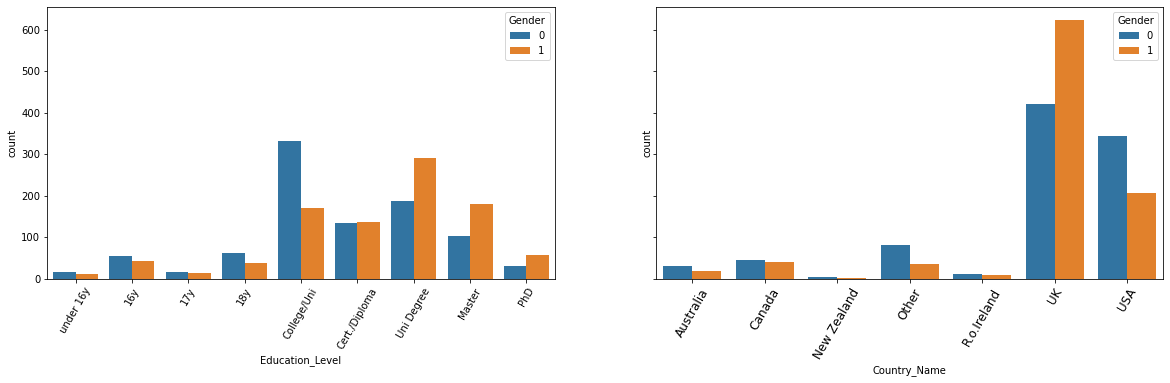

In [15]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 5), sharey=True)

edu_order = ["under 16y", "16y", "17y", '18y', 'College/Uni', 'Cert./Diploma', 'Uni Degree', 'Master', 'PhD']

g = sns.countplot(data=df1, x="Education_Level", order = edu_order, hue='Gender', ax=axes[0])
g.set_xticklabels(edu_order, rotation=60)

g1 = sns.countplot(data=df1, x="Country_Name", hue='Gender', ax=axes[1])
plt.xticks(rotation=60, size = 12);

NameError: name 'month_price_df' is not defined

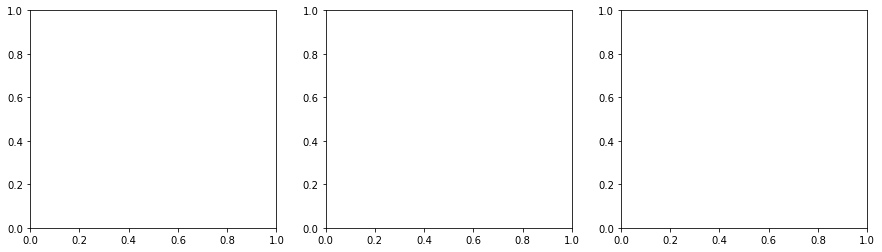

In [16]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,4))
g = sns.lineplot(data=month_price_df, ax=axes[0])
g.set_xticks(range(1, len(month_price_df) + 1)) # <--- set the ticks first
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=90)
g2 = sns.lineplot(data=month_sqft_price_df, ax=axes[1]);
g2.set_xticks(range(1, len(month_price_df) + 1)) # <--- set the ticks first
g2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=90)

Generall overview of drug usage for each drug, gender and last time of consumption

In [ ]:
# plot
f, axes = plt.subplots(4, 5, figsize=(20, 20), sharey=True)
sns.countplot(data=df1, x="Alcohol", order = clsorder, hue='Gender', ax=axes[0, 0])
sns.countplot(data=df1, x="Amphet", order = clsorder, hue='Gender', ax=axes[0, 1])
sns.countplot(data=df1, x="Amyl", order = clsorder, hue='Gender', ax=axes[0, 2])
sns.countplot(data=df1, x="Benzos", order = clsorder, hue='Gender', ax=axes[0, 3])
sns.countplot(data=df1, x="Caff", order = clsorder, hue='Gender', ax=axes[0, 4])
sns.countplot(data=df1, x="Cannabis", order = clsorder, hue='Gender', ax=axes[1, 0])
sns.countplot(data=df1, x="Choc", order = clsorder, hue='Gender', ax=axes[1, 1])
sns.countplot(data=df1, x="Coke", order = clsorder, hue='Gender', ax=axes[1, 2])
sns.countplot(data=df1, x="Crack", order = clsorder, hue='Gender', ax=axes[1, 3])
sns.countplot(data=df1, x="Ecstasy", order = clsorder, hue='Gender', ax=axes[1, 4])
sns.countplot(data=df1, x="Heroin", order = clsorder, hue='Gender', ax=axes[2, 0])
sns.countplot(data=df1, x="Ketamine", order = clsorder, hue='Gender', ax=axes[2, 1])
sns.countplot(data=df1, x="Legalh", order = clsorder, hue='Gender', ax=axes[2, 2])
sns.countplot(data=df1, x="LSD", order = clsorder, hue='Gender', ax=axes[2, 3])
sns.countplot(data=df1, x="Meth", order = clsorder, hue='Gender', ax=axes[2, 4])
sns.countplot(data=df1, x="Shrooms", order = clsorder, hue='Gender', ax=axes[3, 0])
sns.countplot(data=df1, x="Nicotine", order = clsorder, hue='Gender', ax=axes[3, 1])
sns.countplot(data=df1, x="VSA", order = clsorder, hue='Gender', ax=axes[3, 2])

In [ ]:
# there are only 3 people who never consumed alcohol or chocolate, just 1 person never consumed no drugs at all:
df1[(df1["Alcohol"] == "CL0") & (df1["Choc"] == "CL0")]